<center><b>©Content is made available under the CC-BY-NC-ND 4.0 license. Christian Lopez, lopezbec@lafayette.edu<center>

#Introduction to Polynomial Linear Regression





<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/lopezbec/intro_python_notebooks/blob/master/Intro_Poly_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
      </table>
        <br><br></br> 


![alt text](https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/Simple_vs_Poly_LR.jpeg)



 This notebook gives you a brief introduction to Polynomial Linear Regression
<br>

Most of the notebooks we are going to be using are inspired from existing notebooks that available online and are made  free for educational purposes. Nonetheless, this notebook should not be share without prior permission of the instructor. When working in an assignment always remember the [Student Code of Conduct]( https://conduct.lafayette.edu/student-handbook/student-code-of-conduct/).  


# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
#Scikit-learn for implemeting LinearRegression from a existing algorithm.
from sklearn.linear_model import LinearRegression

# Common imports
import numpy as np
import os

from IPython.display import clear_output

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


#Univariate Linear Regression Model


## Lets create some linear data 

In [2]:
import numpy as np
np.random.seed(12)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Select some values for $\theta_0$ & $\theta_1$  and run the cell to try to manually minimize the cost functions

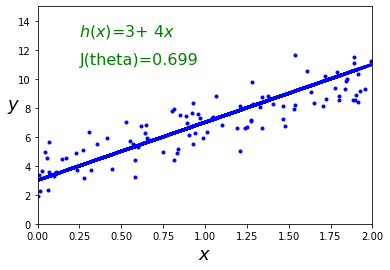

In [3]:
Theta_0=3 #@param {type:"integer", min:0, max:14, step:0.5}
Theta_1=4 #@param {type:"integer",step:0.5}

h_x=[]
for i in range(len(X)):
    h_x_i=Theta_0+(Theta_1*X[i])
    h_x.append(float((h_x_i-y[i])**2))

cost=(1/(2*len(X)))*(sum(h_x))
new_y=[t1+Theta_0 for t1 in [x *Theta_1  for x in X]]
plt.plot(X, new_y, color='blue', linewidth=3)
plt.plot(X, y, "b.")
plt.text(0.25, 13, "$h(x)$={0}+ {1}$x$".format(Theta_0,Theta_1), fontsize=16, color="g")
plt.text(0.25, 11, "J(theta)={}".format(round(cost,3)), fontsize=16, color="g")
plt.axis([0, 2, 0, 15])
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()
    

A Linear model fits the data very well.


## Lets create some non-linear data 

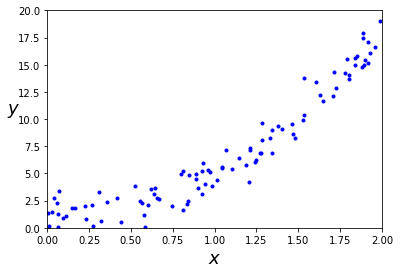

In [4]:
np.random.seed(12)
X = 2 * np.random.rand(100, 1)
y = 2 - 2 * X  + 5* X**2+ (np.random.randn(100, 1))
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 20])
plt.show()


#### A linear model might not fit the data well

3.581279979348104


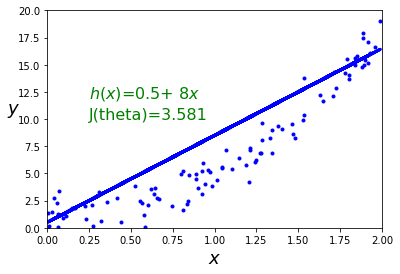

In [5]:
Theta_0=0.5 #@param {step:0.5}
Theta_1=8 #@param {step:0.5}

h_x=[]
for i in range(len(X)):
    h_x_i=Theta_0+(Theta_1*X[i])
    h_x.append(float((h_x_i-y[i])**2))

cost=(1/(2*len(X)))*(sum(h_x))
print(cost)
new_y=[t1+Theta_0 for t1 in [x *Theta_1  for x in X]]
plt.plot(X, new_y, color='blue', linewidth=3)
plt.plot(X, y, "b.")
plt.text(0.25, 12, "$h(x)$={0}+ {1}$x$".format(Theta_0,Theta_1), fontsize=16, color="g")
plt.text(0.25, 10, "J(theta)={}".format(round(cost,3)), fontsize=16, color="g")
plt.axis([0, 2, 0, 20])
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()
    

Lets find the values of theta that minimize our cost function given our linear model


Theta found by sklearn.linear_model: -1.49, 8.15
Cost value: 1.88


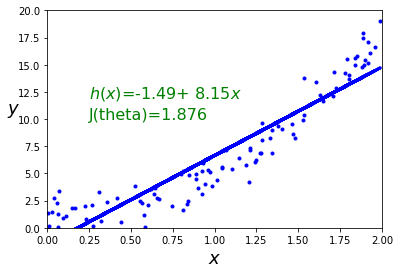

In [6]:
#Train our Linear Regression Model using the Scikit-Learn LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('Theta found by sklearn.linear_model: {0}, {1}'.format(round(lin_reg.intercept_[0],2),round(lin_reg.coef_[0,0],2)))
Theta_0=lin_reg.intercept_[0] 
Theta_1=lin_reg.coef_[0,0]

#Compute Cost (non vectorized)
h_x=[]
for i in range(len(X)):
    h_x_i=Theta_0+(Theta_1*X[i])
    h_x.append(float((h_x_i-y[i])**2))
cost=(1/(2*len(X)))*(sum(h_x))
print("Cost value:", round(cost,2)) 

#Plot with optimal theta values
new_y=[t1+Theta_0 for t1 in [x *Theta_1  for x in X]]
plt.plot(X, new_y, color='blue', linewidth=3)
plt.plot(X, y, "b.")
plt.text(0.25, 12, "$h(x)$={0}+ {1}$x$".format(round(Theta_0,2),round(Theta_1,2)), fontsize=16, color="g")
plt.text(0.25, 10, "J(theta)={}".format(round(cost,3)), fontsize=16, color="g")
plt.xlabel("$x$", fontsize=18)
plt.axis([0, 2, 0, 20])
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

#### A Non-linear model should fit the data better

First lets add a second variable to our matrix X to createa a 2nd order polynomial model

In [7]:
## Add x^2
X_2 = np.stack([ X[:,0],X[:,0]**2,], axis=1)
##Add X_0= ones for our intercept
X_2 = np.hstack([np.ones(shape=(y.size,1)), X_2])

In [8]:
#Train our Linear Regression Model using the Scikit-Learn LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_2, y)
theta_2p=np.array([[lin_reg.intercept_[0] ], [lin_reg.coef_[0,1]], [lin_reg.coef_[0,2]]])
print('Theta found by sklearn.linear_model: {0}, {1},{2}'.format(round(theta_2p[0,0],2),round(theta_2p[1,0],2),round(theta_2p[2,0],2)))
#Vectorized cost calculations
def computeCost(X, y, theta):
    return 1/(2*y.size)*np.sum(np.square(X.dot(theta)-y))
print("Cost value:", computeCost(X_2, y, theta_2p)) 

Theta found by sklearn.linear_model: 1.5, -1.41,4.82
Cost value: 0.5735908634225666


### Lets compare both our models (1st vs 2nd order polynomial models)

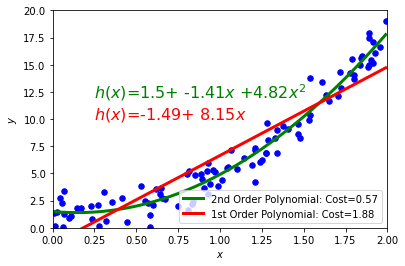

In [9]:
xx = np.arange(0,2, 0.01)
yy_2p = theta_2p[0]+(theta_2p[1]*xx)+(theta_2p[2]*(xx**2))
yy_1p = Theta_0+(Theta_1*xx)


# Plot gradient descent
plt.scatter(X[:,0], y, s=30, c='b', marker='o', linewidths=1)
plt.plot(xx,yy_2p,color="g",linewidth=3, label='2nd Order Polynomial: Cost={}'.format(round(computeCost(X_2, y, theta_2p),2)))
plt.text(0.25, 12,"$h(x)$={0}+ {1}$x$ +{2}$x^2$".format(round(theta_2p[0,0],2),round(theta_2p[1,0],2),round(theta_2p[2,0],2)), fontsize=16, color="g")
plt.plot(xx,yy_1p,color="r",linewidth=3, label='1st Order Polynomial: Cost={}'.format(round(cost,2)))
plt.text(0.25, 10,"$h(x)$={0}+ {1}$x$".format(round(Theta_0,2),round(Theta_1,2)), fontsize=16, color="r")

plt.rcParams['figure.figsize'] = [10, 5]
plt.xlim(0,2)
plt.ylim(0,20)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc=4);

### We can have even higher  order polynomial models

Text(0.25, 10, 'Cost=0.5487')

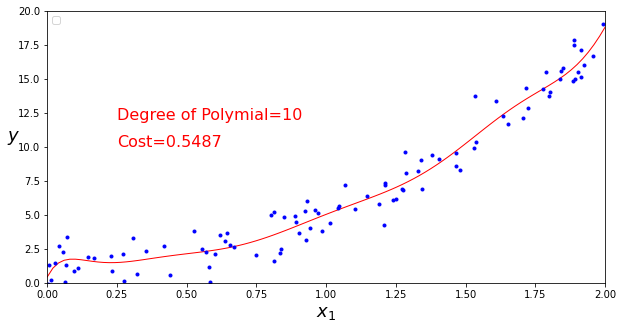

In [18]:
#Create polynomial features
from sklearn.preprocessing import PolynomialFeatures
Degree_of_the_Polynomial_Model=10 #@param {type:"integer", min:1, max:14, step:1}
poly_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
X_poly = poly_features.fit_transform(X)

#Fit model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

#Compute cost
coe=lin_reg.coef_
interc=lin_reg.intercept_
coe=coe.reshape(coe.size,1)
interc=interc.reshape(interc.size,1)
theta_p=np.vstack([interc,coe])
##Add X_0= ones for our intercept
X_new_poly2 = np.hstack([np.ones(shape=(y.size,1)), X_poly])
cost=computeCost(X_new_poly2, y, theta_p)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
X_new=np.linspace(0, 2, 100).reshape(100, 1)

style="g-" 
width=1
degree=Degree_of_the_Polynomial_Model

polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()


polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)



plt.plot(X_new, y_newbig, "r", linewidth=width)
plt.text(0.25, 12,"Degree of Polymial={}".format(degree), fontsize=16, color="r")



plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 20])

plt.text(0.25, 10,"Cost={}".format(round(cost,4)), fontsize=16, color="r")


Text(0.25, 10, 'Cost=0.5186')

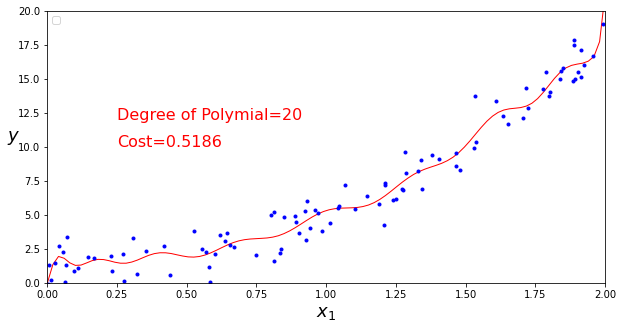

In [19]:
#Create polynomial features
from sklearn.preprocessing import PolynomialFeatures
Degree_of_the_Polynomial_Model=20 #@param {type:"integer", min:1, max:14, step:1}
poly_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
X_poly = poly_features.fit_transform(X)

#Fit model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

#Compute cost
coe=lin_reg.coef_
interc=lin_reg.intercept_
coe=coe.reshape(coe.size,1)
interc=interc.reshape(interc.size,1)
theta_p=np.vstack([interc,coe])
##Add X_0= ones for our intercept
X_new_poly2 = np.hstack([np.ones(shape=(y.size,1)), X_poly])
cost=computeCost(X_new_poly2, y, theta_p)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
X_new=np.linspace(0, 2, 100).reshape(100, 1)

style="g-" 
width=1
degree=Degree_of_the_Polynomial_Model

polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()


polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)



plt.plot(X_new, y_newbig, "r", linewidth=width)
plt.text(0.25, 12,"Degree of Polymial={}".format(degree), fontsize=16, color="r")



plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 20])

plt.text(0.25, 10,"Cost={}".format(round(cost,4)), fontsize=16, color="r")


As you increase the order of the polynomial, the model fit the data better (i.e., the cost function get smaller).

But wait!! what about when we have a very larger polynomial model? (e.g., 55, 80,300) 


Text(0.25, 10, 'Cost=0.5693')

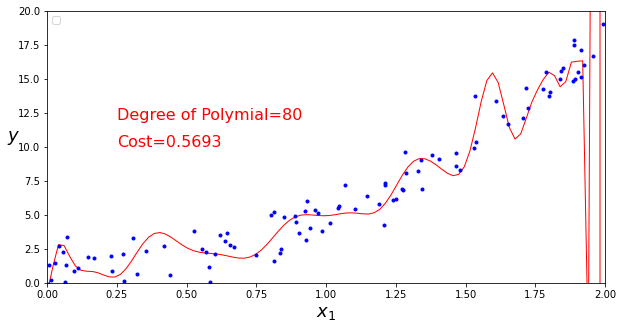

In [15]:
#Create polynomial features
from sklearn.preprocessing import PolynomialFeatures
Degree_of_the_Polynomial_Model=80 #@param {type:"integer", min:1, max:14, step:1}
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)

#Fit model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

#Compute cost
coe=lin_reg.coef_
interc=lin_reg.intercept_
coe=coe.reshape(coe.size,1)
interc=interc.reshape(interc.size,1)
theta_p=np.vstack([interc,coe])
##Add X_0= ones for our intercept
X_new_poly2 = np.hstack([np.ones(shape=(y.size,1)), X_poly])
cost=computeCost(X_new_poly2, y, theta_p)
###############################################################



from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
X_new=np.linspace(0, 2, 100).reshape(100, 1)

style="g-" 
width=1
degree=Degree_of_the_Polynomial_Model

polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()


polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)



plt.plot(X_new, y_newbig, "r", linewidth=width)
plt.text(0.25, 12,"Degree of Polymial={}".format(degree), fontsize=16, color="r")



plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 20])

plt.text(0.25, 10,"Cost={}".format(round(cost,4)), fontsize=16, color="r")


A "perfect" fit (one in which all the data points are matched) can often be gotten by setting the degree of the regression to the number of data pairs minus one. But, depending on the nature of the data set, this can also sometimes produce the pathological result that produce an out-of-control function wanders freely between data points in order to match the data exactly.